In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import tqdm
import numpy as np


def read_dimacs_graph(filename):
    G = nx.Graph()
    with open(filename, "r") as f:
        for line in f:
            if line.startswith("a"):
                _, u, v, w = line.strip().split()
                G.add_edge(int(u), int(v), weight=int(w))
    return G


def plot_degree_distribution(G: nx.Graph, name=""):
    """
    Degree of a node in a network is the number of connections it has to other nodes
    Degree distribution is the probability distribution of these degrees over the whole network.
    """
    degrees = [G.degree(n) for n in G.nodes()]

    plt.hist(
        degrees,
        bins=range(min(degrees), max(degrees) + 2),
        align="left",
        edgecolor="black",
    )
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution - {name}")
    plt.show()


def plot_weight_distribution(G1: nx.Graph, G2: nx.Graph, name=""):
    weights1 = [d["weight"] for _, _, d in G1.edges(data=True)]
    weights2 = [d["weight"] for _, _, d in G2.edges(data=True)]

    plt.figure(figsize=(8, 8))
    plt.hist(weights1, bins="auto", alpha=0.6, edgecolor="black")
    plt.hist(weights2, bins="auto", alpha=0.6, edgecolor="black")
    plt.xscale("log")
    plt.xlabel("Edge Weight (log scale)")
    plt.ylabel("Frequency")
    plt.title(f"Edge Weight Distribution: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


def shortest_path_kernel(graphs, max_paths=5, n_samples=10):
    def normalize_2d(matrix):
        norm = np.linalg.norm(matrix)
        matrix = matrix / norm  # normalized matrix
        return matrix

    phi_train = np.zeros((len(graphs), max_paths))

    for i, graph in enumerate(graphs):
        for j in range(n_samples):
            pair = np.random.choice(graph.nodes(), 2)
            source, target = pair[0], pair[1]

            path_length = nx.shortest_path_length(graph, source, target)
            path_length = min(path_length, max_paths - 1)

            phi_train[i][path_length] += 1

    res = np.dot(phi_train, phi_train.T)

    return normalize_2d(res)


def info(G: nx.Graph, name: str = ""):
    V = G.number_of_nodes()
    E = G.number_of_edges()
    max_E = V * (V - 1) // 2
    density = E / max_E if max_E > 0 else 0
    components = nx.number_connected_components(G)

    print(f"Graph: {name}")
    print(f"  Nodes (V): {V}")
    print(f"  Edges (E): {E}")
    print(f"  Max Edges (Complete Graph): {max_E}")
    print(f"  Density: {density:.8f}")
    print(f"  Connected Components: {components}\n")

    return {
        "Graph": name,
        "Nodes": V,
        "Edges": E,
        "Max Edges": max_E,
        "Density": density,
        "Connected Components": components,
    }


In [6]:
DISTANCE_GRAPH_FILES = {
    "Great Lakes": "USA-road-d.LKS.gr",
    "California and Nevada": "USA-road-d.CAL.gr",
    "Northeast USA": "USA-road-d.NE.gr",
    "Northwest USA": "USA-road-d.NW.gr",
    "Florida": "USA-road-d.FLA.gr",
    "Colorado": "USA-road-d.COL.gr",
    "San Francisco Bay Area": "USA-road-d.BAY.gr",
    "New York City": "USA-road-d.NY.gr",
}
TIME_GRAPH_FILES = {
    "Great Lakes": "USA-road-t.LKS.gr",
    "California and Nevada": "USA-road-t.CAL.gr",
    "Northeast USA": "USA-road-t.NE.gr",
    "Northwest USA": "USA-road-t.NW.gr",
    "Florida": "USA-road-t.FLA.gr",
    "Colorado": "USA-road-t.COL.gr",
    "San Francisco Bay Area": "USA-road-t.BAY.gr",
    "New York City": "USA-road-t.NY.gr",
}

In [ ]:
def analyze_graphs(graph_files):
    density = []
    for name, filename in graph_files.items():
        G = read_dimacs_graph(filename)

        res = info(G, name=name)
        density.append(res["Density"])

        plot_weight_distribution(G, name)

    print(f"MEAN DENSITY: {np.mean(np.array(density))}.")


def compare_graphs(graph_files):
    """Example graph comparing using graph kernel."""
    graphs = []

    for _, filename in tqdm.tqdm(graph_files.items()):
        G = read_dimacs_graph(filename)
        graphs.append(G)

    return shortest_path_kernel(graphs, 1000, 50)

def compare_graph_weights(graph_file1, graph_file2, name):
    G1 = read_dimacs_graph(graph_file1)
    G2 = read_dimacs_graph(graph_file2)

    plot_weight_distribution(G1, G2, name)

/tmp/ipykernel_1636/3008896142.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


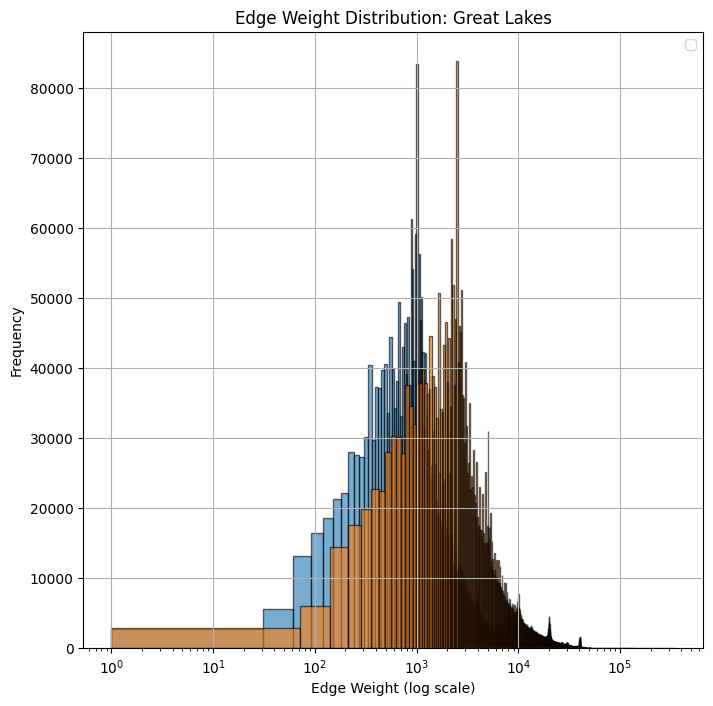

In [8]:
# print("DISTANCE GRAPHS")
# analyze_graphs(DISTANCE_GRAPH_FILES)

# print("TIME GRAPHS")
# analyze_graphs(TIME_GRAPH_FILES)

compare_graph_weights("USA-road-d.LKS.gr", "USA-road-t.LKS.gr", "Great Lakes")